<a href="https://colab.research.google.com/github/Maysk/data_science_alura/blob/main/deep_learning_previsao_keras/previsao_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [27]:
#deep_learning_previsao_com_keras
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (15,6)
mpl.rcParams['font.size'] = 21

##Carregando dataset

In [16]:
passageiros_raw = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')

In [17]:
passageiros_raw.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


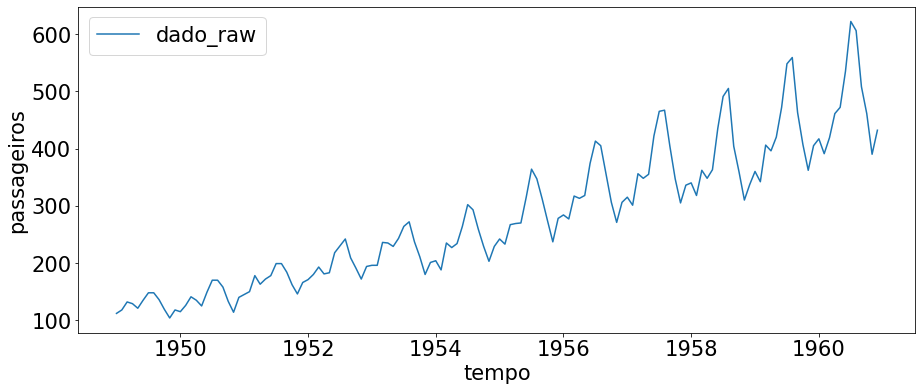

In [30]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros_raw, label='dado_raw')

In [21]:
sc = StandardScaler();
sc.fit(passageiros_raw);

In [23]:
dataset_escalado = sc.transform(passageiros_raw)
x = dataset_escalado[:,0]
y = dataset_escalado[:,1]

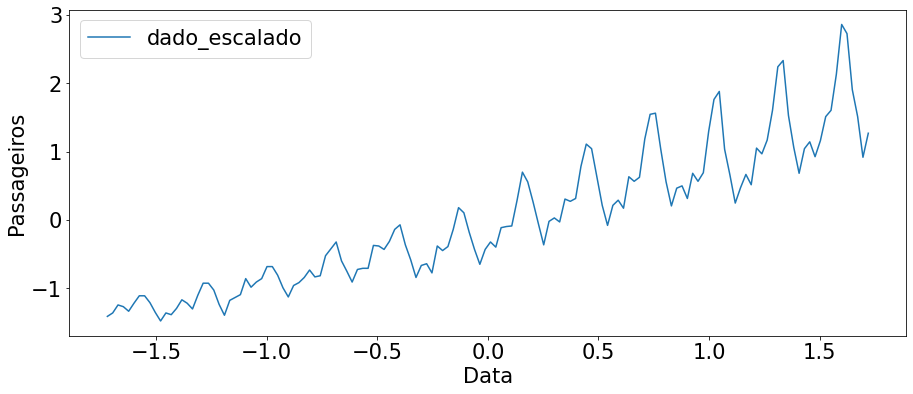

In [28]:
plt.ylabel('Passageiros')
plt.xlabel('Data')
sns.lineplot(x=x, y=y, label='dado_escalado')

In [33]:
tamanho_dataset = len(passageiros_raw)
tamanho_treino = int(tamanho_dataset * 0.9)
tamanho_teste = tamanho_dataset - tamanho_treino

In [36]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]
xteste = x[tamanho_treino:tamanho_dataset]
yteste = y[tamanho_treino:tamanho_dataset]


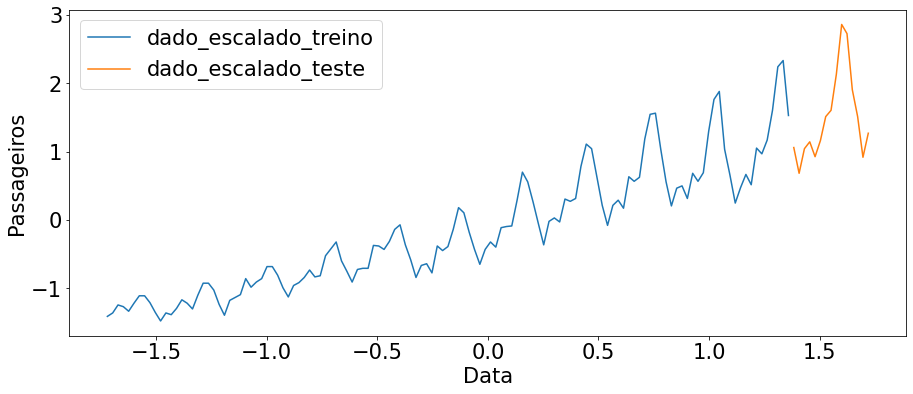

In [38]:
plt.ylabel('Passageiros')
plt.xlabel('Data')
sns.lineplot(x=xtreino, y=ytreino, label='dado_escalado_treino')
sns.lineplot(x=xteste, y=yteste, label='dado_escalado_teste')